In [1]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Lets Install and import Required libraries

In [2]:
pip install BeautifulSoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lxml

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 6.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 4.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
from bs4 import BeautifulSoup  # Web Crawler
import requests # used to make requests from web
import pandas as pd
import lxml
import geocoder
import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import lxml

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url).text

In [17]:
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

In [18]:
#our dataframe will have three columns "PostalCode, Borough, and Neighborhood"
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,Postalcode,Borough,Neighborhood


In [19]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [20]:
table_contents[0]

{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'}

In [21]:
for data in table_contents:
    postalCode  = data['PostalCode']
    neighborhood_name = data['Borough']        
    borough = data['Neighborhood']
    
    df = df.append({'Postalcode': postalCode,
                                          'Borough': neighborhood_name,
                                          'Neighborhood': borough
                                          }, ignore_index=True)

In [29]:
df


,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


#### Cleaning of our data frame

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
And drop the rows where borough itself is Not assigned.

In [23]:
# Simply get the rows which has Borough
df=df[df['Borough']!='Not assigned']

Check if a value exists in a Borough column

In [24]:
exists = 'Not assigned' in df['Borough']
exists

False

Hence there in no cell in column 'Borough' having value => Not Assigned.

Now if a cell has a Not assigned in neighborhood column then use value of 'Borough'.

In [25]:
df[df['Neighborhood']=='Not assigned']=df['Borough'].reset_index()
df.head()

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [26]:
temp_df=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

In [27]:
df_merge = pd.merge(df, temp_df, on='Postalcode')
df_merge.drop(['Neighborhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)

In [28]:
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df_merge

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [30]:
df_merge.shape

(103, 3)

#### Part 2

Now we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

I was not able to get the geographical coordinates of the neighborhoods using the Geocoder package, so I used
csv file.


link -> http://cocl.us/Geospatial_data

In [32]:
cord_df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [33]:
cord_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [34]:
cord_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
cord_merged = pd.merge(cord_df, df_merge, on='Postalcode')
cord_merged.head()

,Postalcode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [35]:
geo_data=cord_merged[['Postalcode','Borough','Neighborhood','Latitude','Longitude']]

In [36]:
geo_data

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


We will work with boroughs that contain the word Toronto

In [37]:
toronto_data=geo_data[geo_data['Borough'].str.contains("Toronto")]
toronto_data = toronto_data.drop(['Postalcode'], axis = 1)


In [38]:
toronto_data

,Borough,Neighborhood,Latitude,Longitude
37,East Toronto,The Beaches,43.676357,-79.293031
40,East YorkEast Toronto,The Danforth East,43.685347,-79.338106
41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,East Toronto,Studio District,43.659526,-79.340923
44,Central Toronto,Lawrence Park,43.728020,-79.388790
45,Central Toronto,Davisville North,43.712751,-79.390197
46,Central Toronto,North Toronto West,43.715383,-79.405678
47,Central Toronto,Davisville,43.704324,-79.388790
48,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [39]:
CLIENT_ID = 'C2BMYANVYZY4N2F4KBR2BMBKBMS20RJ0OVOALAK44XFUWVAU' # your Foursquare ID
CLIENT_SECRET = 'RZ0OE3JMBPFPR5WHDRBDNGHY5H1DRQJPHJ35KY2HQOVABGMB' # your Foursquare Secret
ACCESS_TOKEN = 'OBIUEPVCLFO0XHE1VJYCSDS1JX5D1KUARQV2ZQTEZESR05FG' # your FourSquare Access Token
VERSION = '20210602'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C2BMYANVYZY4N2F4KBR2BMBKBMS20RJ0OVOALAK44XFUWVAU
CLIENT_SECRET:RZ0OE3JMBPFPR5WHDRBDNGHY5H1DRQJPHJ35KY2HQOVABGMB


In [40]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

#### We will define a function for getting the venues

In [41]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
   
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

##### Define function to retieve ratings and likes of the venue

In [42]:
def get_venue_details(venue_id):
        
    
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

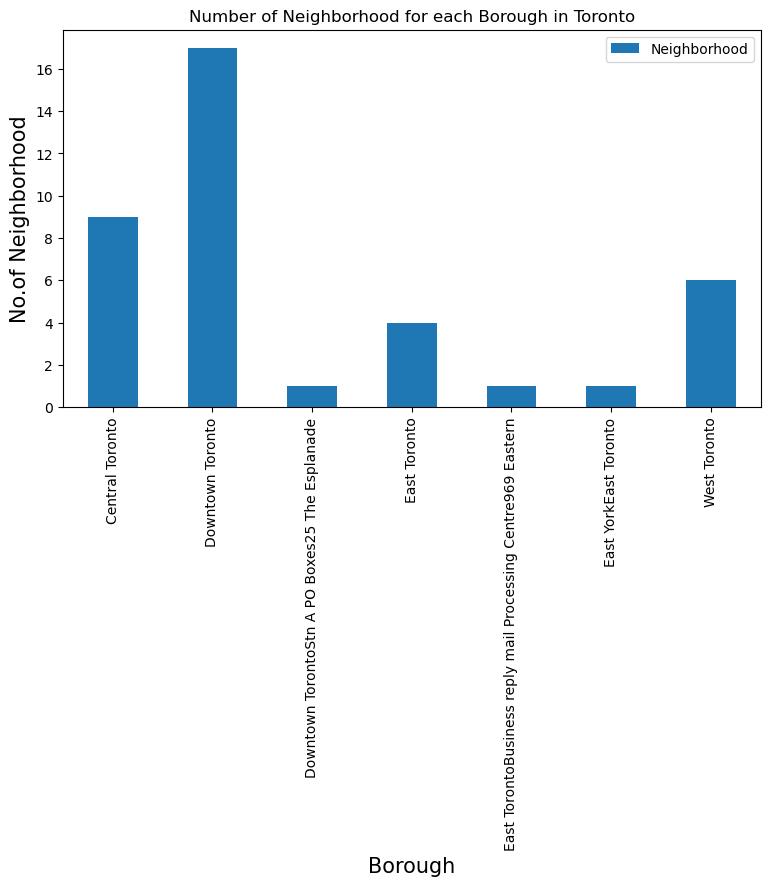

In [43]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
toronto_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [44]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_to=pd.DataFrame(columns=column_names)
count=1
for row in toronto_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(toronto_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_to = indian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 39 ) Indian Resturants in The Beaches, East Toronto:2
( 2 / 39 ) Indian Resturants in The Danforth  East, East YorkEast Toronto:1
( 3 / 39 ) Indian Resturants in The Danforth West, Riverdale, East Toronto:1
( 4 / 39 ) Indian Resturants in India Bazaar, The Beaches West, East Toronto:5
( 5 / 39 ) Indian Resturants in Studio District, East Toronto:0
( 6 / 39 ) Indian Resturants in Lawrence Park, Central Toronto:0
( 7 / 39 ) Indian Resturants in Davisville North, Central Toronto:1
( 8 / 39 ) Indian Resturants in North Toronto West, Central Toronto:0
( 9 / 39 ) Indian Resturants in Davisville, Central Toronto:2
( 10 / 39 ) Indian Resturants in Moore Park, Summerhill East, Central Toronto:0
( 11 / 39 ) Indian Resturants in Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park, Central Toronto:0
( 12 / 39 ) Indian Resturants in Rosedale, Downtown Toronto:0
( 13 / 39 ) Indian Resturants in St. James Town, Cabbagetown, Downtown Toronto:1
( 14 / 39 ) Indian Resturants in Churc

Now we got all the indian restaurants in the Toronto City

In [45]:
indian_rest_to.head()

,Borough,Neighborhood,ID,Name
0,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
1,East Toronto,The Beaches,4b60e4a1f964a52023002ae3,ali's tandoori curry house
2,East YorkEast Toronto,The Danforth East,4c9fe5ca03133704df8d76d5,Raj Kapuri Paan & Snacks
3,East Toronto,"The Danforth West, Riverdale",4c1d5337eac020a1cb1048c2,Sher-E-Punjab
4,East Toronto,"India Bazaar, The Beaches West",4ae0c7a8f964a520638221e3,Udupi Palace


In [46]:
indian_rest_to.shape

(24, 4)

We got 27 Indian Resturants across Toronto City

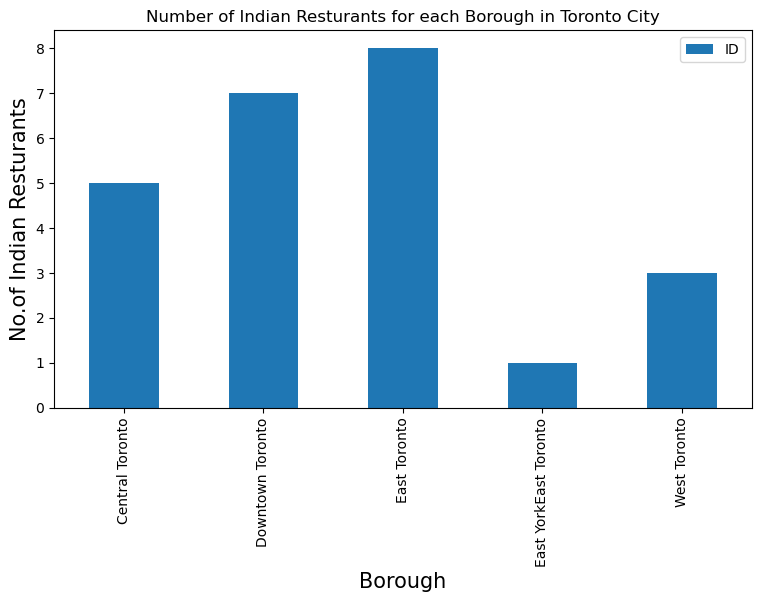

In [47]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_to.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that East Toronto has the largest number of indian resturants

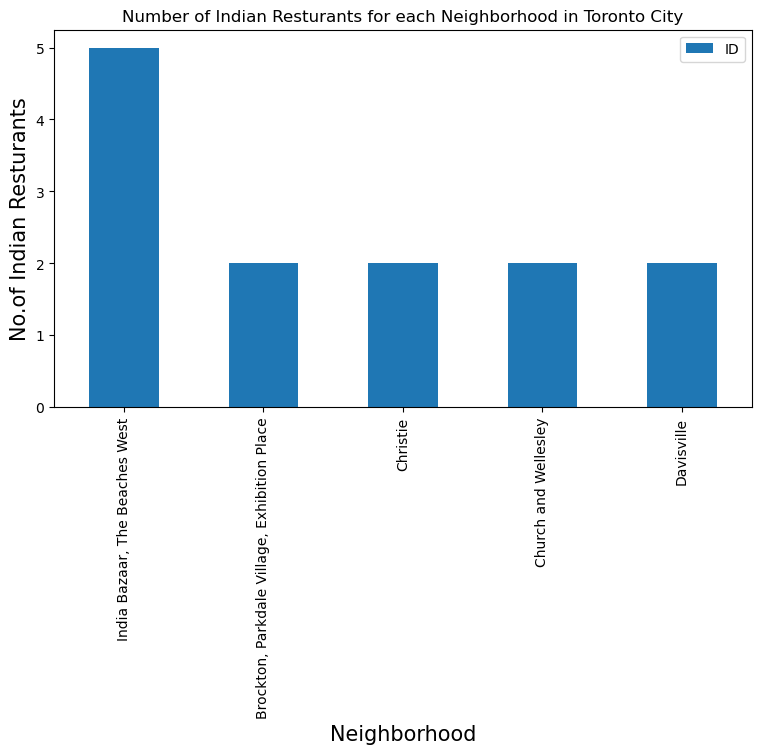

In [48]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in Toronto City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_to.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

From Above we can observe the Neighborhood named "India Bazar" and "The Beaches West" has most number of 
Indian Restaurants.
If you look in the Postal Code dataframe (df)  you will see both Neighborhood has same postal code i.e,  M4L

From above we can tell the postal code with M4L has the maximum number of Indian Restaurants.

Now we will get the ranking of each resturant for further analysis.

In [49]:
#prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_to=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_to.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_to),')','processed')
    indian_rest_stats_to = indian_rest_stats_to.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4dcd7c6352b1f8915b7e7f7e
( 1 / 24 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4b60e4a1f964a52023002ae3
( 2 / 24 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c9fe5ca03133704df8d76d5
( 3 / 24 ) processed
                         ID           Name  Likes  Rating  Tips
0  4c1d5337eac020a1cb1048c2  Sher-E-Punjab     11     7.0     8
( 4 / 24 ) processed
                         ID          Name  Likes  Rating  Tips
0  4ae0c7a8f964a520638221e3  Udupi Palace     77     8.1    31
( 5 / 24 ) processed
                         ID       Name  Likes  Rating  Tips
0  4afc9816f964a520312422e3  Motimahal     25     8.1    13
( 6 / 24 ) processed
                         ID              Name  Likes  Rating  Tips
0  4bac30a2f964a52018ea3ae3  Bombay Chowpatty      7     7.5     5
( 7 / 24 ) p

In [50]:
indian_rest_stats_to.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,East Toronto,The Beaches,0,0,0,0,0
1,East Toronto,The Beaches,0,0,0,0,0
2,East YorkEast Toronto,The Danforth East,0,0,0,0,0
3,East Toronto,"The Danforth West, Riverdale",4c1d5337eac020a1cb1048c2,Sher-E-Punjab,11,7,8
4,East Toronto,"India Bazaar, The Beaches West",4ae0c7a8f964a520638221e3,Udupi Palace,77,8.1,31


Hurray!!
Now I fetched the Likes , Ratings, and Tips(user reviews) of the Indian restaurants in the city.

In [51]:
indian_rest_stats_to.shape

(24, 7)

In [52]:
indian_rest_to.shape

(24, 4)

From above we can observe we have fetched all data required for all the Indian restaurants in the city

Lets save this in CSV form

In [53]:
indian_rest_stats_to.to_csv('indian_rest_stats_to.csv', index=False)

Let's verify the saves csv file

In [54]:
indian_rest_stats_to_csv=pd.read_csv('indian_rest_stats_to.csv')

In [55]:
indian_rest_stats_to_csv

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,East Toronto,The Beaches,0,0,0,0.0,0
1,East Toronto,The Beaches,0,0,0,0.0,0
2,East YorkEast Toronto,The Danforth East,0,0,0,0.0,0
3,East Toronto,"The Danforth West, Riverdale",4c1d5337eac020a1cb1048c2,Sher-E-Punjab,11,7.0,8
4,East Toronto,"India Bazaar, The Beaches West",4ae0c7a8f964a520638221e3,Udupi Palace,77,8.1,31
5,East Toronto,"India Bazaar, The Beaches West",4afc9816f964a520312422e3,Motimahal,25,8.1,13
6,East Toronto,"India Bazaar, The Beaches West",4bac30a2f964a52018ea3ae3,Bombay Chowpatty,7,7.5,5
7,East Toronto,"India Bazaar, The Beaches West",4bbcc0efa0a0c9b60ebd1a0f,Haandi 2000,3,6.7,7
8,East Toronto,"India Bazaar, The Beaches West",4d8d278a1d06b1f712942a3b,Gautama,15,5.9,14
9,Central Toronto,Davisville North,4b7ccc72f964a520e3a52fe3,Banjara Indian Cuisine,25,6.7,20


In [56]:
indian_rest_stats_to_csv.shape

(24, 7)

In [57]:
indian_rest_stats_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       24 non-null     object
 1   Neighborhood  24 non-null     object
 2   ID            24 non-null     object
 3   Name          24 non-null     object
 4   Likes         24 non-null     object
 5   Rating        24 non-null     object
 6   Tips          24 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


We see that values like Likes, Tips are string values. We need to convert them into float values for further analysis.

In [58]:
indian_rest_stats_to[['Likes','Tips']]=indian_rest_stats_to[['Likes','Tips']].astype('float64')

In [59]:
indian_rest_stats_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       24 non-null     object 
 1   Neighborhood  24 non-null     object 
 2   ID            24 non-null     object 
 3   Name          24 non-null     object 
 4   Likes         24 non-null     float64
 5   Rating        24 non-null     object 
 6   Tips          24 non-null     float64
dtypes: float64(2), object(5)
memory usage: 1.4+ KB


Now Likes, Rating, Tips are converted to float and can be used for further analysis.

Lets find out average rating of resturants in the particular Neighborhood

In [62]:
to_neighborhood_stats=indian_rest_stats_to.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
to_neighborhood_stats.columns=['Neighborhood','Average Rating']

KeyError: "['Rating'] not in index"

Let's Sort them according to the Ratings they achieved

In [61]:
to_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

NameError: name 'to_neighborhood_stats' is not defined

We see Neighborhood 'Christie' has Maximum Rating of 8.45

Similarly lets do it for Borough

In [ ]:
to_borough_stats=indian_rest_stats_to.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
to_borough_stats.columns=['Borough','Average Rating']

In [ ]:
#Sort them
to_borough_stats.sort_values(['Average Rating'],ascending=False).head()


Borough Downtown Toronto has the Max Ratings with 7.92

Lets visualize it.

In [ ]:
plt.figure(figsize=(10,7), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_to.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Now we will consider all the neighborhoods with average rating greater or equal 6.0 to visualize on map

In [ ]:
to_neighborhood_stats=to_neighborhood_stats[to_neighborhood_stats['Average Rating']>=6.0]

In [ ]:

to_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head()

Now we will merge the toronto dataset to get Latitude and Longitude

In [ ]:
to_neighborhood_stats=pd.merge(to_neighborhood_stats,toronto_data, on='Neighborhood')

In [ ]:
to_neighborhood_stats=to_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [ ]:
to_neighborhood_stats

Now above we have the restaurants which has ratings grater or equal to 6.0 and their Geo-Co-ordinates

Lets Visualise it!

In [ ]:
to_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)

In [ ]:
to_map

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in to_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [ ]:
to_neighborhood_stats['Label']=to_neighborhood_stats['Neighborhood']+', '+to_neighborhood_stats['Borough']+'('+to_neighborhood_stats['Average Rating'].map(str)+')'

In [ ]:
# add pop-up text to each marker on the map
for lat, lng, label in to_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(to_map)        
# add incidents to map
to_map.add_child(incidents)

In [ ]:
to_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)
to_geo = r'https://github.com/jasonicarter/toronto-geojson/blob/master/toronto_crs84.geojson'

to_map.choropleth(
    geo_data=to_geo,
    data=to_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

In [ ]:
to_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

## Conclusion

#### Below are the Best Neighborhoods to open an Indian Restaurant

Christie,High Park,The Junction South, The Annex, North Midtown, Yorkville, Church and Wellesley, Queen's Park, Ontario Provincial Government, St. James Town, Cabbagetown

### Limitations 

1. The Results are highly dependent on the ratings of the Restaurants.
2. The Rating Accuracy is highly dependent on Foursquare API.